<a href="https://colab.research.google.com/github/ingaluxemburg/neural_network_lessons_and_tasks/blob/master/NeuralNetwork_L1_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Введение

### Раньше было лучше...
Что умели давно: реализовывать алгоритмы, которые находят закономерности в табличных данных, т.е. данных без пространственной структуры.
- линейные модели
- логические модели


$a(X, W)$ - алгоритм с параметрами $W$ (собранными в вектор). Действуя на матрицу признаков $X$, возвращает $\hat y$ - столбец ответов.


Loss Function $Q(X, W, y)$ - функция от параметров алгоритма, которая показывает, насколько алгоритм с такими параметрами плохо работает

Gradient Descent - метод нахождения минимума функции, основанной на том, что вектор градиента всегда направлен в сторону возрастания функции.

### Что было дальше?

1943 — У. Маккалок и У. Питтс: биологические процессы -> математика. 
Н.Винер: математика -> компьютер.

1958 — Ф. Розенблатт -> однослойный перцептрон.

### Как работает мозг в 3 словах

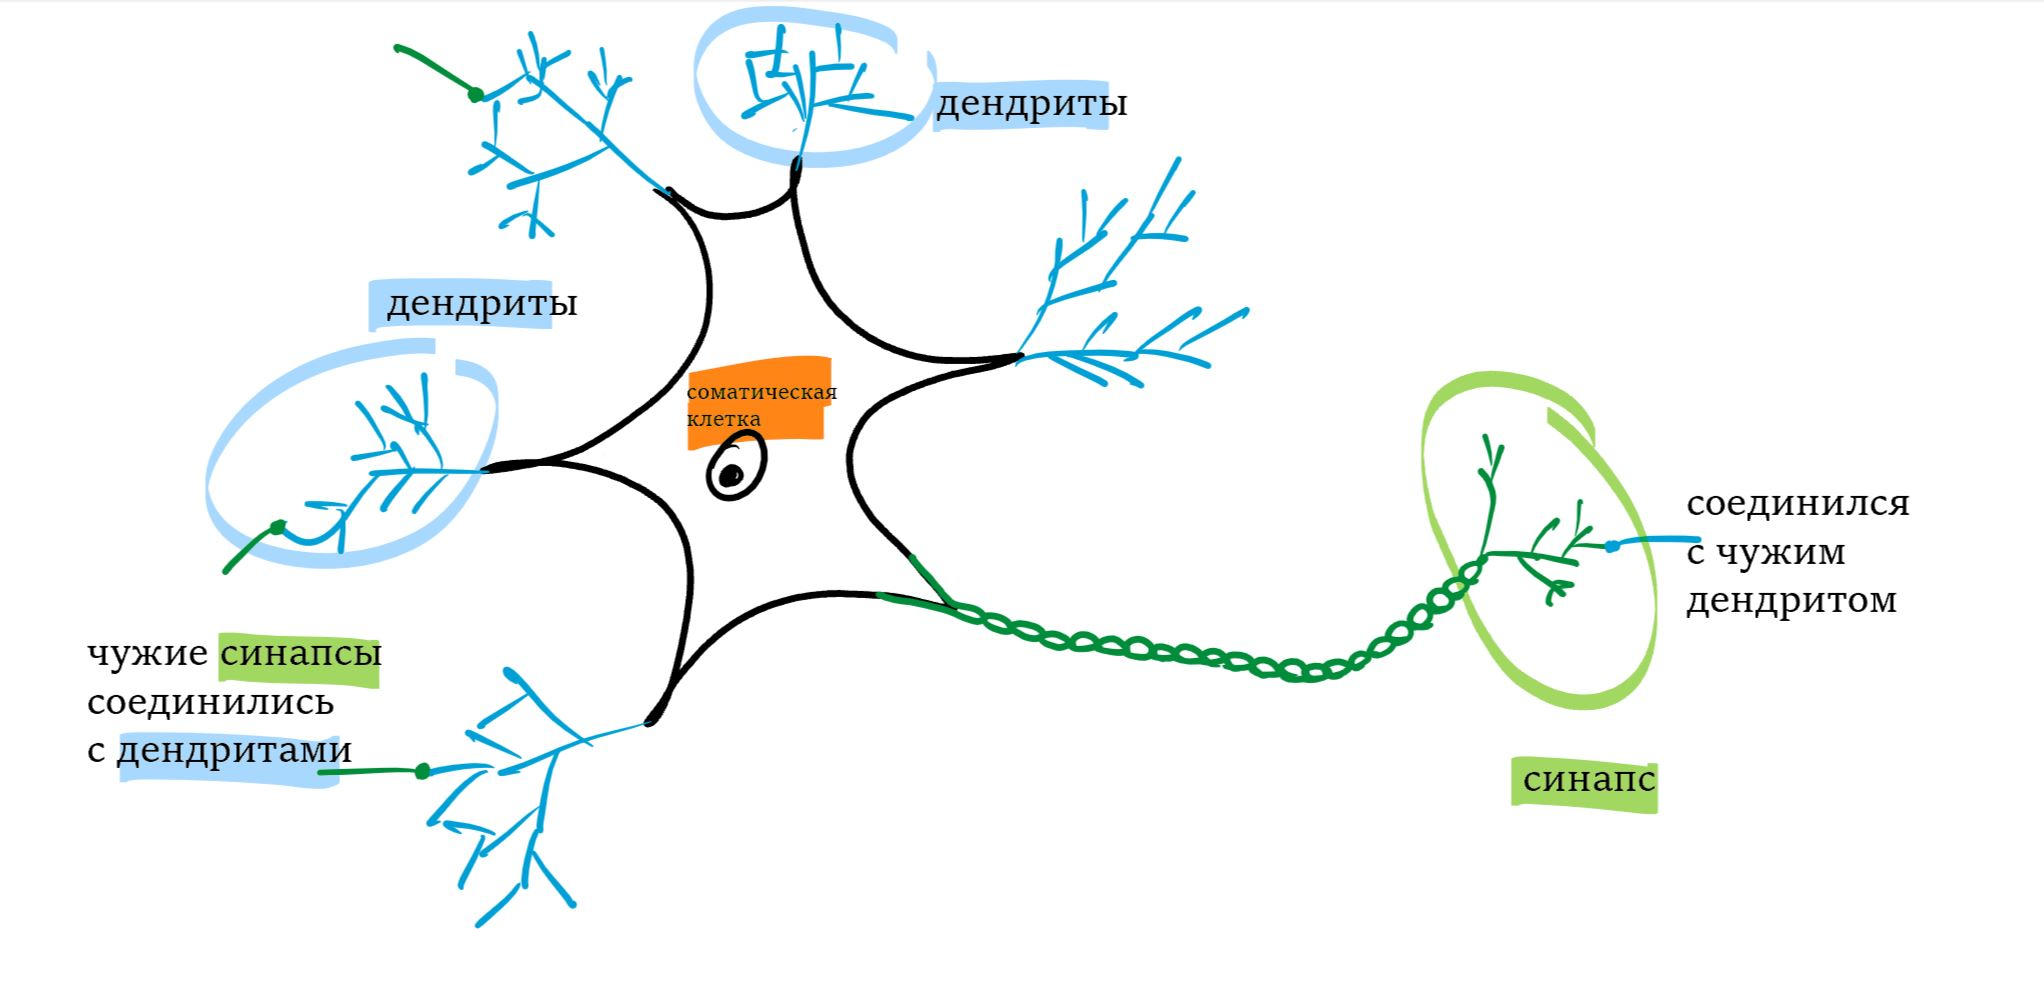

## Модель простейшей нейронной сети без обучения

### Задача:

Маша выбирает квартиру по следующим критериям: ей нравятся недорогие квартиры у природы и недалеко от метро.

Каждую квартиру можно представить в виде трех чисел, причем каждое из них - это либо 0 либо 1:

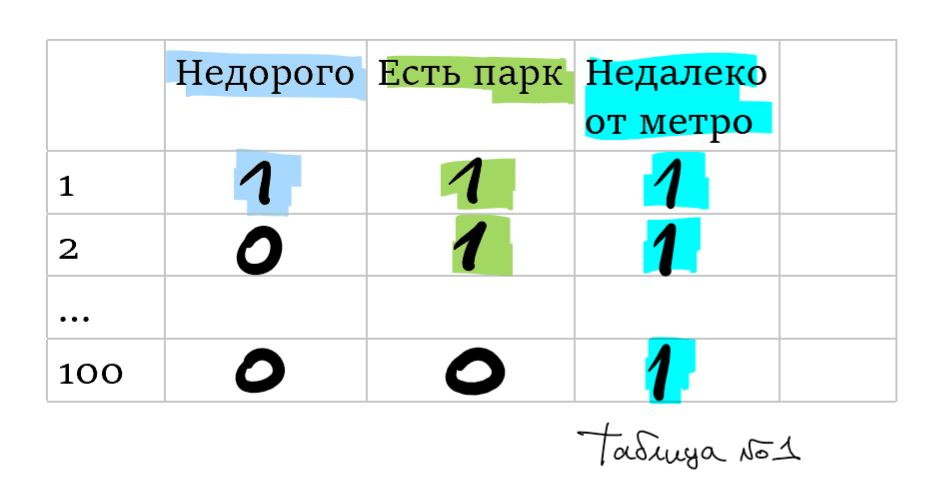

Дальше уточним предпочтения Маши на случай, если идеального варианта нет. Допустим, Маша принимает решение так:



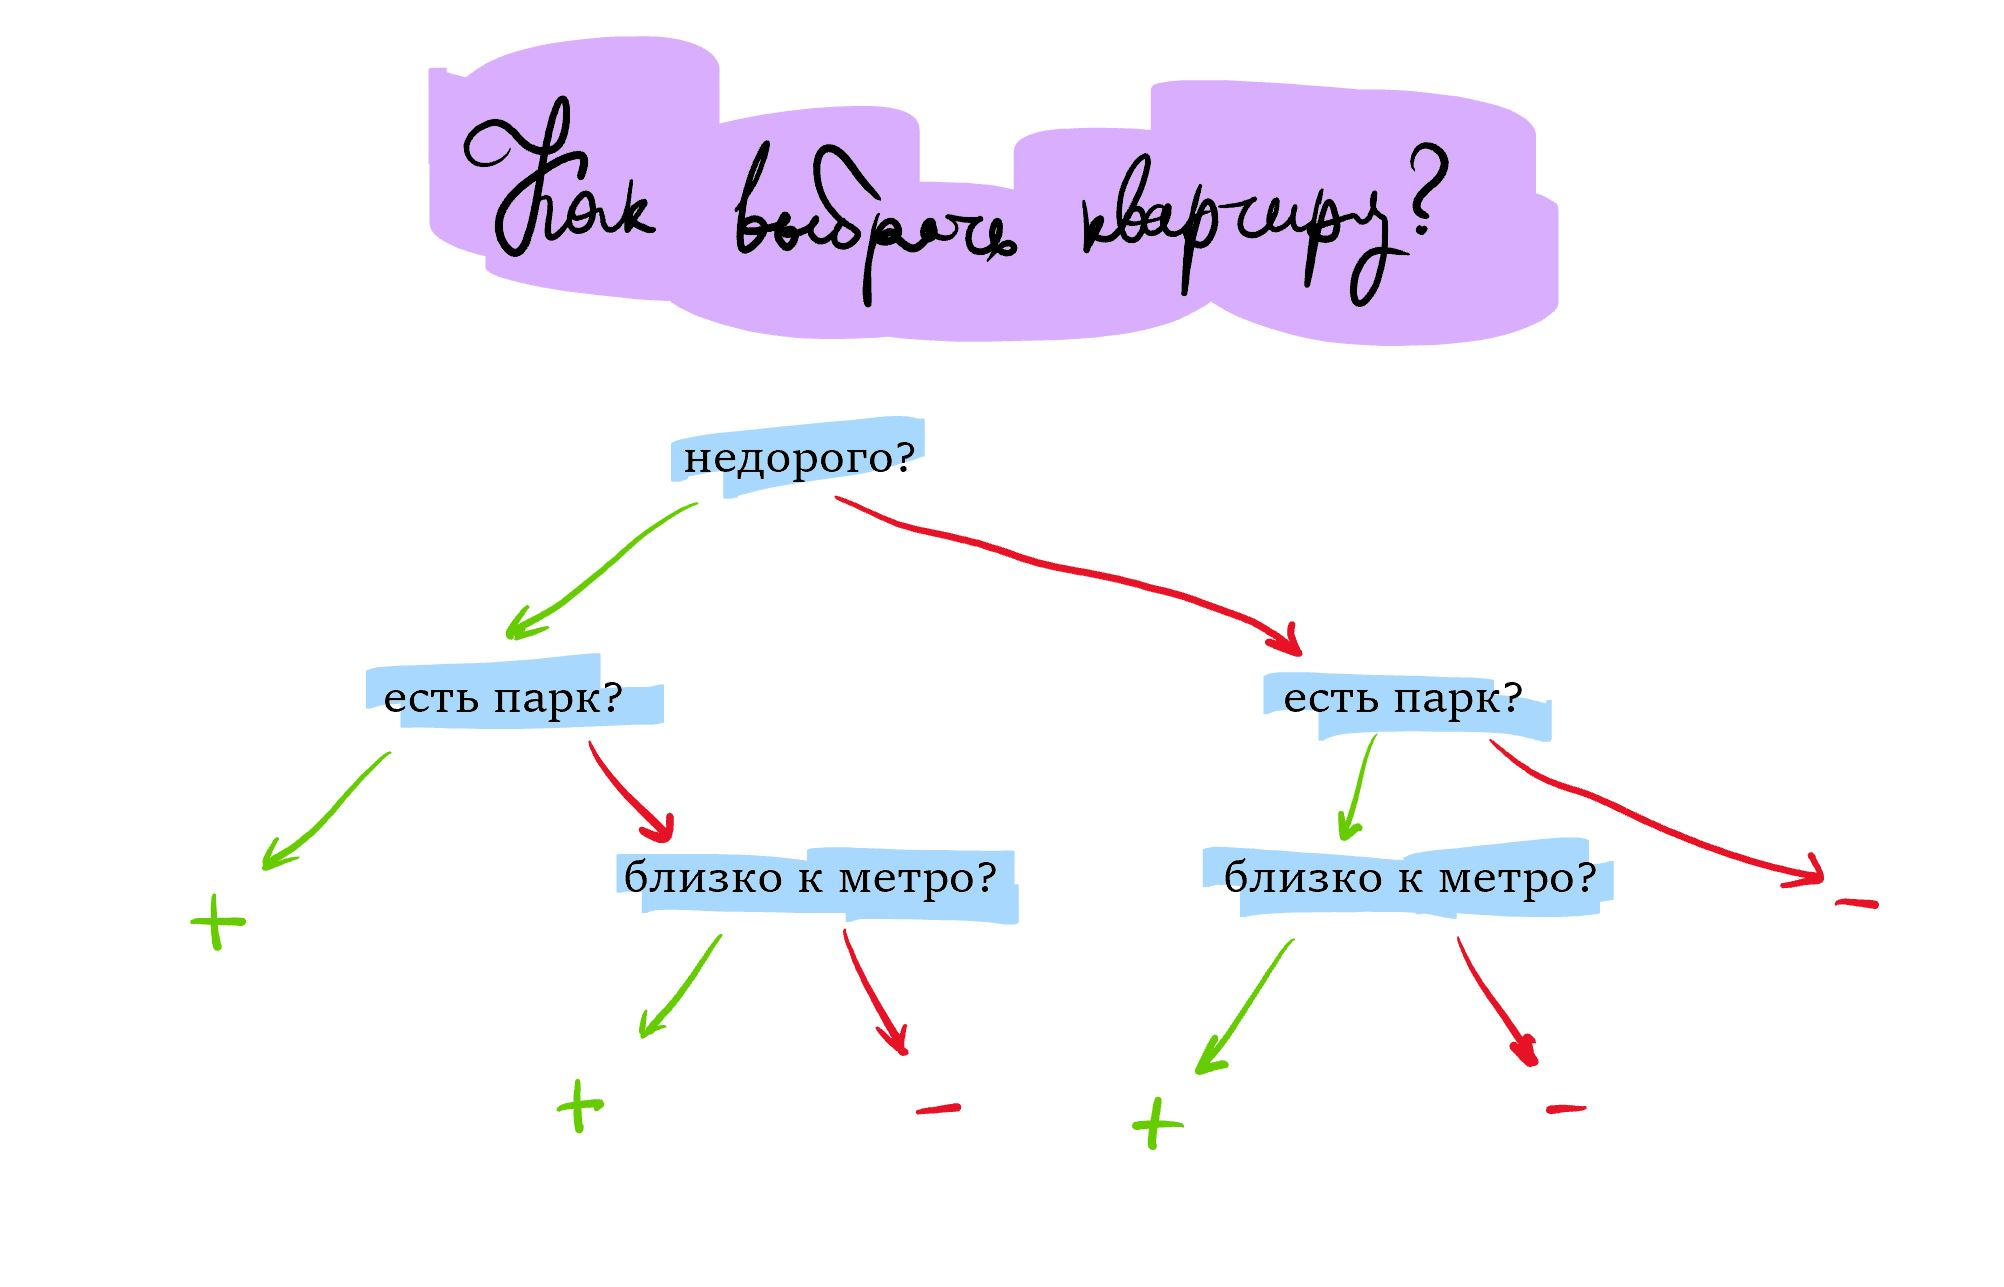





Представим чебе, что у Маши есть три нейрона, каждый из которых учавствует в процессе принятия решения о покупке квартиры: нейрон цены, нейрон природы и нейрон метро. 

В эти нейроны будет послупать соответствующая информация о квартирах: нули и единицы.

Далее каждый нейрон должен умножить поступивший на него сигнал на свой коэффициент, и отправить его дальше - в нейрон-сумматор.

В этом нейроне сумматоре, по аналогии с биологическим нейроном, будет установлен некоторый порог: если суммарный пришедший сигнал будет больше или равен порогового значения - нейрон выдаст сигнал 1, что означает что квартира одобрена. Если же сумма не "пробьет" порог - сигнал из сумматора будет 0, что означает, что квартира не подходит. 

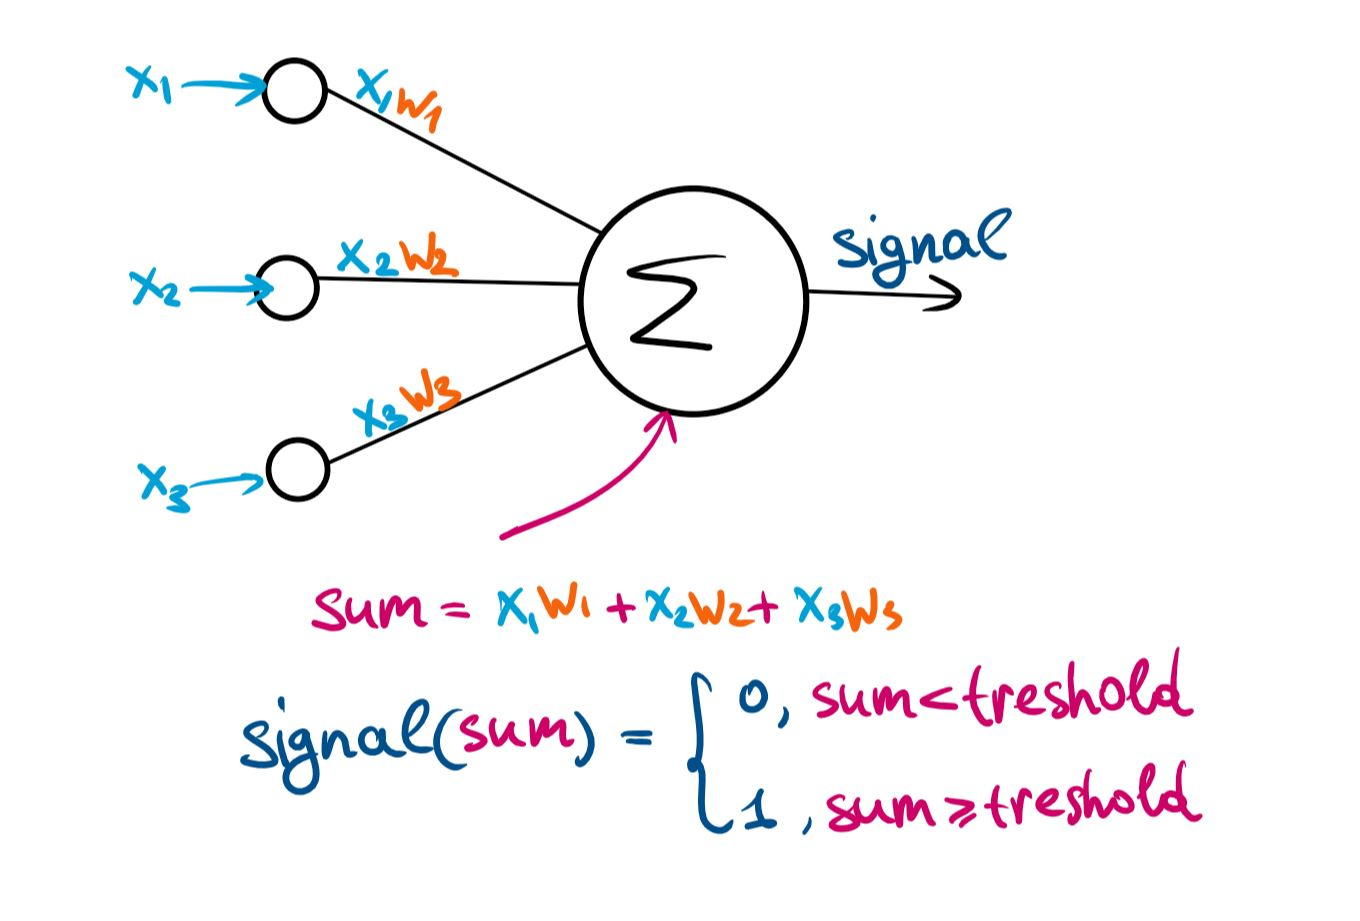

Итак, чтобы создать наш первый нейрон, мы должны нзадать его **параметры $W$** и **пороговое значение treshold**. (Как мы потом узнаем, кроме сумматора с порогом есть еще много других типов **активации**)

Поскольку пока мы не знаем, как заставить сеть найти эти параметры самостоятельно, попробуем сделать это вручную.

Наиболее простая идея: попробуем сделать все коэффициенты $w_i$ единичными, и подобрать нужное значение порога. Для этого напишем "контрольные суммы" над соответствующими линиями алгоритма:

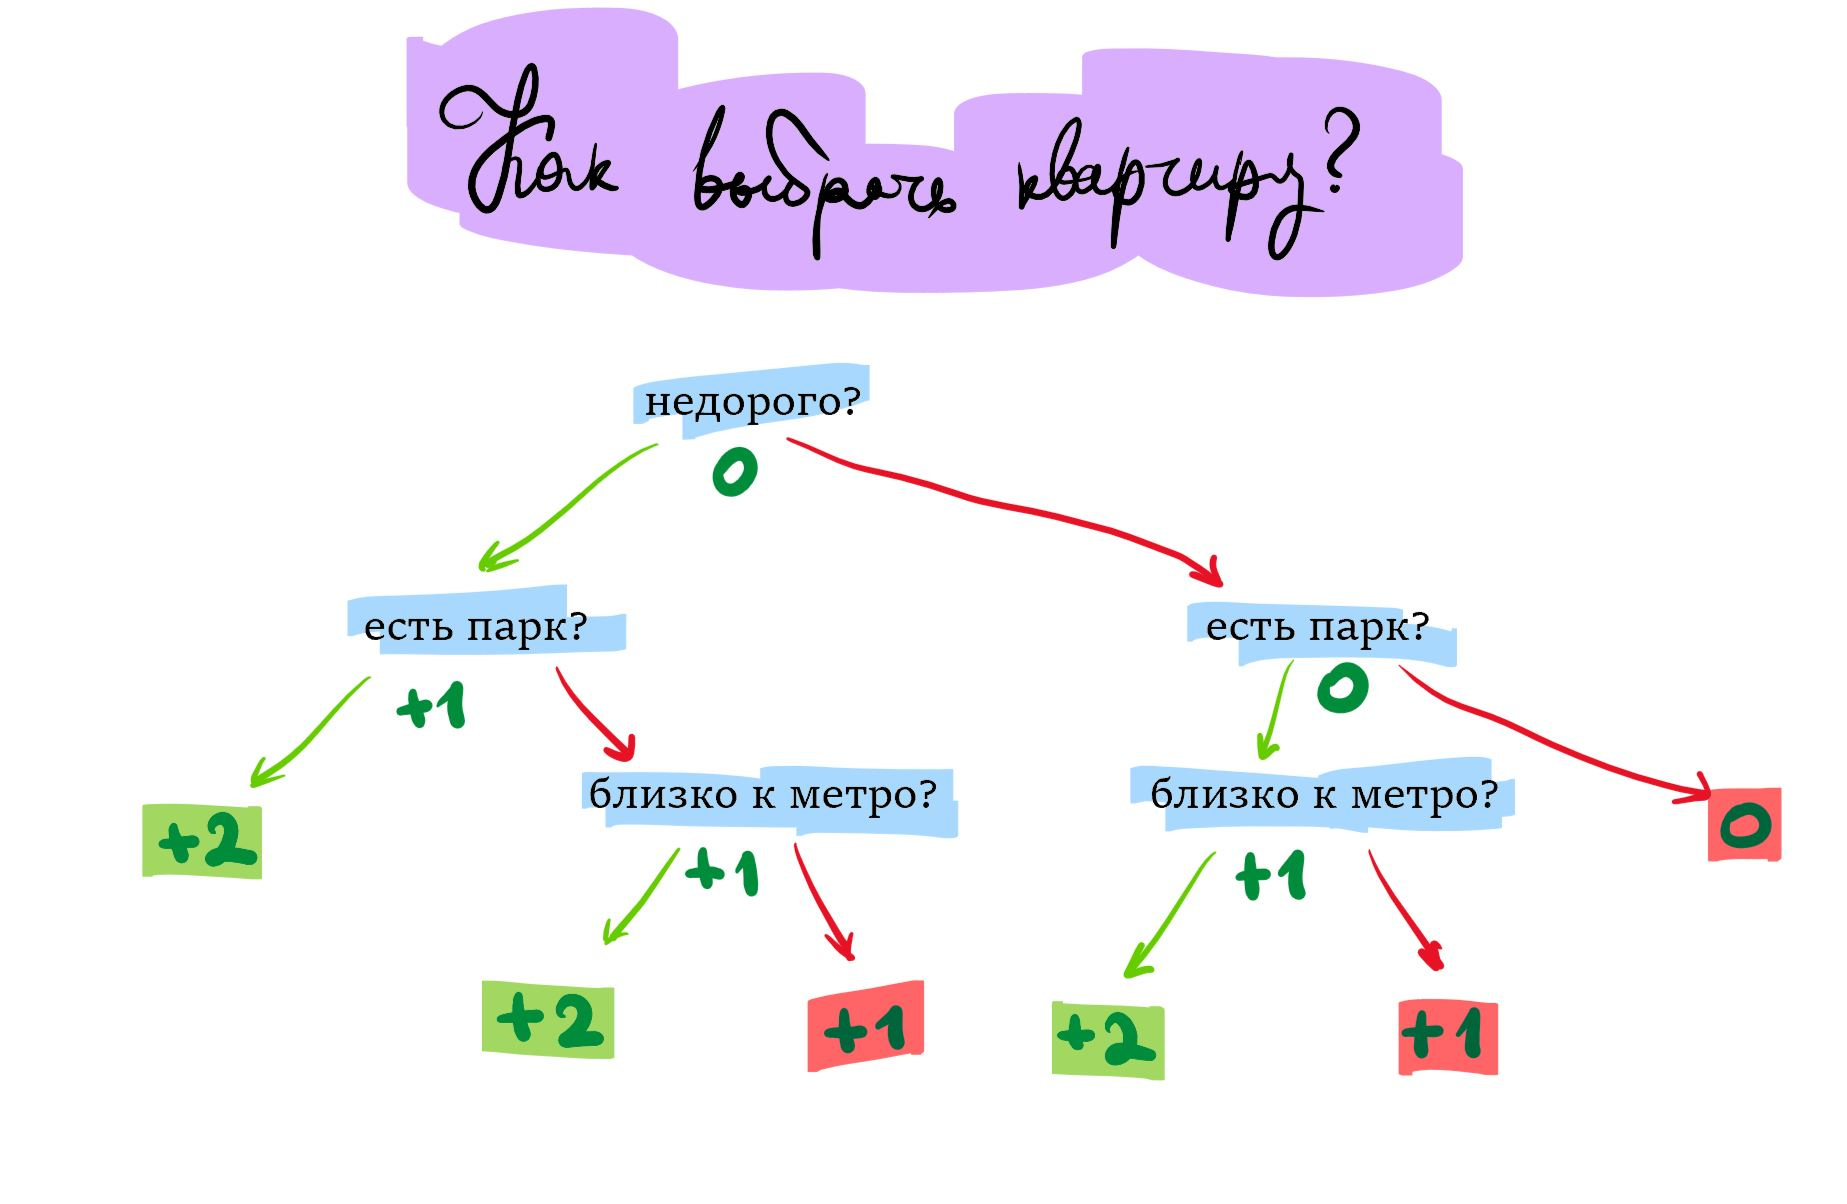

Числа в листьях нашего дерева - это и есть итоговые значения sum в нашем нейроне-сумматоре. Нетрудно увидеть, что любое число между 1 и 2 подойдет в качестве разделяющего порога. Можем взять, например, $t = 1.5$.

### Реализация

1) Определим функцию my_first_nn, которая будет принимать столбец длины 3, а возвращать - ноль либо единицу.

1.1) Определим функцию-порог, которая будет выдавать 1 в случае, если поступившее в нее число больше порога, и 0 во всех остальных случаях.

2) Внутри функции my_first_nn создадим столбец W также длины 3, и поместим в него коэффициенты наших нейронов.

3) Заведем переменную my_sum, в которую запишем сумму $w_1x_1 + w_2x_2 + w_3x_3$.

4) Применим функцию-порог к sum, и вернем результат работы этой функции.


In [ ]:
def my_treshold(summ, t=0.5):

  return (int(summ>=t))

In [ ]:
def my_first_nn(flat):
  
  # put code here

  return

Теперь применим полученный нейрон к данным квартирам:
* идеальная [1, 1, 1]
* ужасная [0, 0, 0]
* дорогая [0, 1, 1]
* не у метро [0, 1, 0]

In [ ]:
import numpy as np

In [ ]:
flats = np.array([[1, 1, 1], [0, 0, 0], [0, 1, 1], [0, 1, 0]])

In [ ]:
answer = my_first_nn(flats)

## Задание:
Маша считает, что наличие в квартире тараканов это решающий фактор: если они есть, то Маша ни за что не выберет такую квартиру, какой бы хорошей по остальным критериям она ни была.

Измените функции нашего нейрона (и описание данных), принимая во внимание это новое обстоятельство.

### На следующем занятии: 
- узнаем, как заставить нейросеть самостоятельно искать свои параметры
- напишем самообучающийся нейрон, восстанавливающий прямую зависимость